In [34]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
pd.plotting.register_matplotlib_converters()

In [2]:
GEP1 = pd.read_csv('../data/GEP/Consumption_15min.csv', index_col=0, header=0, names=['value'])
ERCOT = pd.read_csv('../data/ERCOT/ercot_data.csv', index_col=0, header=0, names=['value','T'])
GEFCOM = pd.read_csv('../data/GEFCom2014/gefcom2014.csv', index_col=0, header=0, names=['value'])
Dieteren = pd.read_csv('../data/Dieteren_case/Consumption_15min.csv', index_col=0, header=0, names=['value'])

In [3]:
GEP1 = GEP1.sort_index()
GEP1.index = pd.to_datetime(GEP1.index)

In [4]:
GEFCOM = GEFCOM.sort_index()
GEFCOM.index = pd.to_datetime(GEFCOM.index)

In [5]:
ERCOT = ERCOT.sort_index()
ERCOT.index = pd.to_datetime(ERCOT.index)

In [6]:
Dieteren = Dieteren.sort_index()
Dieteren.index = pd.to_datetime(Dieteren.index)

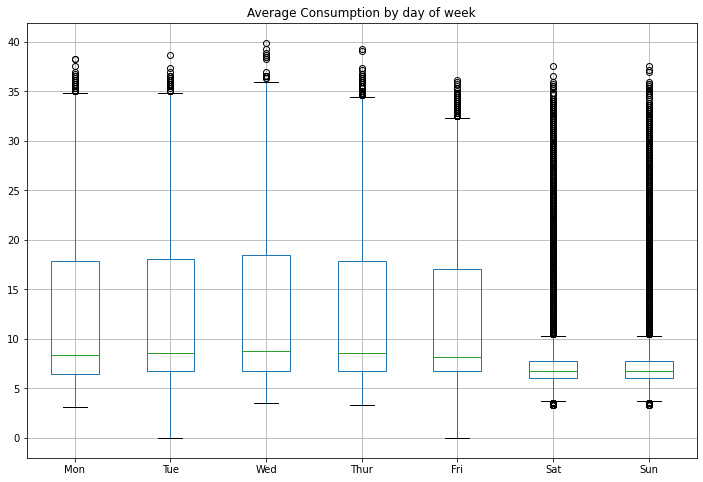

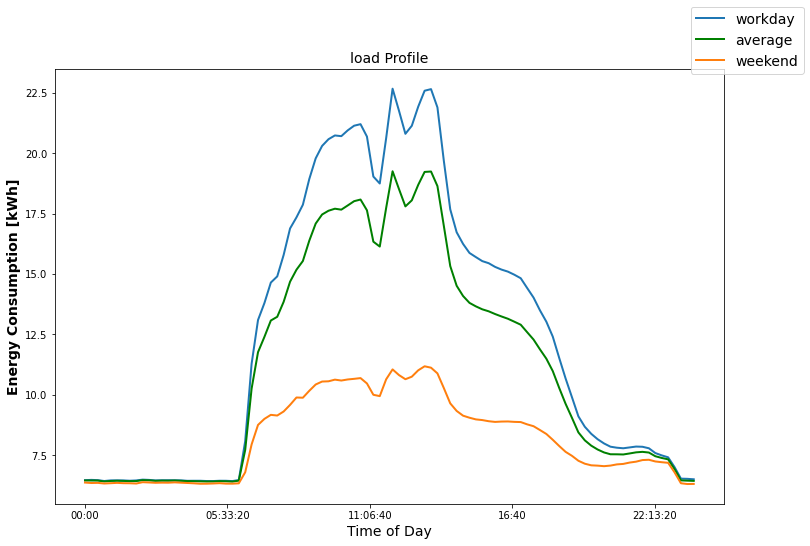

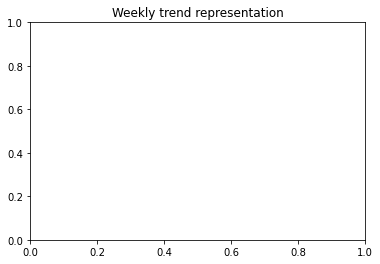

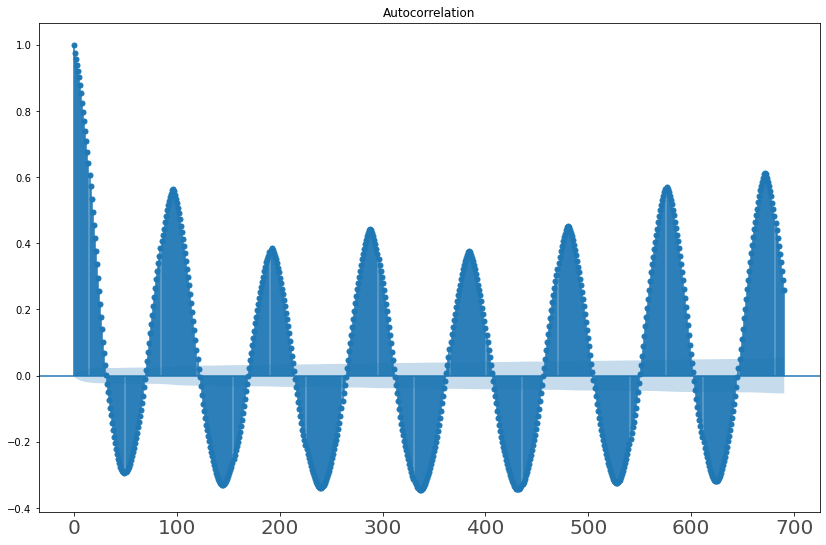

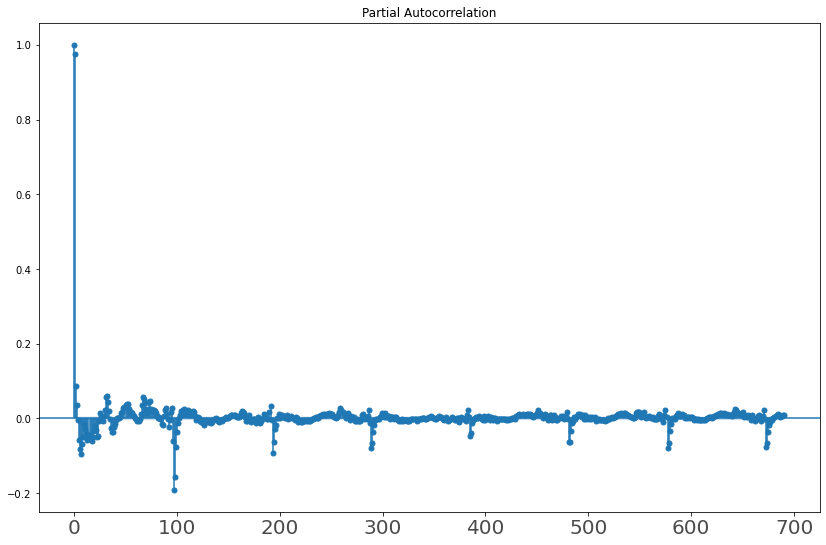

In [36]:
daysofweek(GEP1)
loadprofile(GEP1)
plot_weeks(GEP1)
acf(GEP1)
pacf(GEP1)

In [7]:
def daysofweek(df):
    df.index = pd.to_datetime(df.index)
    days = ['Mon', 'Tue', 'Wed', 'Thur', 'Fri', 'Sat', 'Sun']
    fig, ax = plt.subplots()
    fig.set_size_inches(12, 8)
    df['dayofweek'] = df.index.dayofweek
    grouped2 = pd.pivot_table(df, values='value', columns=['dayofweek'], index=df.index)
    grouped2.boxplot()
    ax.set_xticks(np.sort(df['dayofweek'].unique() + 1))
    ax.set_xticklabels(days)
    plt.title('Average Consumption by day of week')
    df.drop('dayofweek', axis=1)
    #plt.show()

In [8]:
def histogram(df):
    plt.hist(df.iloc[:,0], alpha=0.5)
    plt.show()

In [9]:
def plot_weeks(df):
    #list of names for xtick labels. Extra Monday for end.
    weekday_names = "Mon Tue Wed Thu Fri Sat Sun".split(' ')
    fig, ax = plt.subplots()
    years = df.index.year.unique()
    for year in years:
        for name, group in df[str(year)].groupby(df.index.isocalendar().week):
            start_day = group.index.min()
            Xs = group.index - start_day
            #print(Xs.astype('timedelta64[h]'))
            if (len(Xs) > 168):
                continue
            #    print(group)
            Xs = pd.Series(Xs.astype('timedelta64[h]'))
            Ys = group.iloc[:,0]
            plt.rcParams['figure.figsize'] = [14, 9]
            ax.scatter(Xs, Ys)
    #fig.legend()
    plt.title('Weekly trend representation')
    #plt.show()

In [10]:
def acf(dataset):
    plt.rcParams['figure.figsize'] = [14, 9]
    plot_acf(dataset.iloc[:,0], lags=690)
    plt.xticks(fontsize=20, alpha=.7)
    plt.show()

In [11]:
def pacf(dataset):
    plt.rcParams['figure.figsize'] = [14, 9]
    plot_pacf(dataset.iloc[:,0], lags=690)
    plt.xticks(fontsize=20, alpha=.7)
    plt.show()

In [35]:
def loadprofile(data, mode='all'):
    fig, ax = plt.subplots(1, figsize=(12,8))
    ax.set_title('load Profile', fontsize=14)
    ax.set_ylabel('Energy Consumption [kWh]', fontsize=14, weight='bold')
    ax.set_xlabel('Time of Day', fontsize=14)
    time = data.iloc[data.index.dayofweek < 4,0].groupby(data[data.index.dayofweek < 4].index.time).mean()
    ax.plot(time.index, time, linewidth=2.0, label='workday')
    time = data.iloc[:,0].groupby(data.index.time).mean()
    ax.plot(time.index, time, 'g', linewidth=2.0, label='average')
    time = data.iloc[data.index.dayofweek > 4,0].groupby(data[data.index.dayofweek > 4].index.time).mean()
    ax.plot(time.index, time, linewidth=2.0, label='weekend')
    fig.legend(fontsize=14)

TypeError: float() argument must be a string or a number, not 'datetime.time'

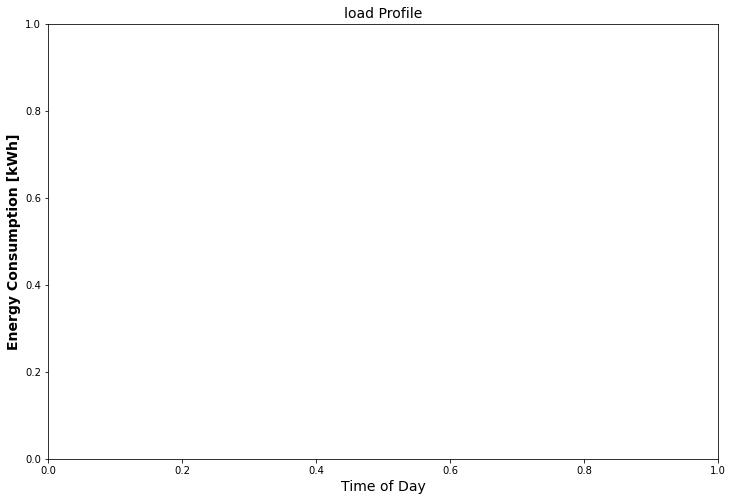

In [27]:
loadprofile(GEP1)
plt.title('GEP1 Load Profile')
loadprofile(Dieteren)
plt.title('Dieteren Load Profile')
loadprofile(GEFCOM)
plt.title('GEFCOM2014 Load Profile')
loadprofile(ERCOT)
plt.title('ERCOT Load Profile')

Text(0.5, 1.0, 'ERCOT case load by day of week')

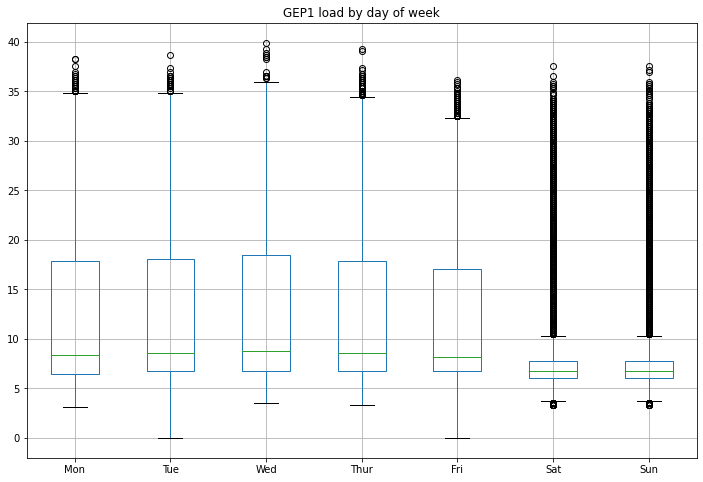

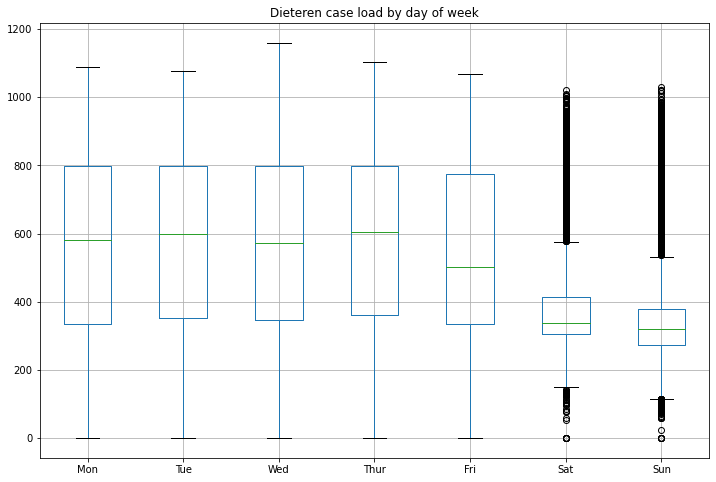

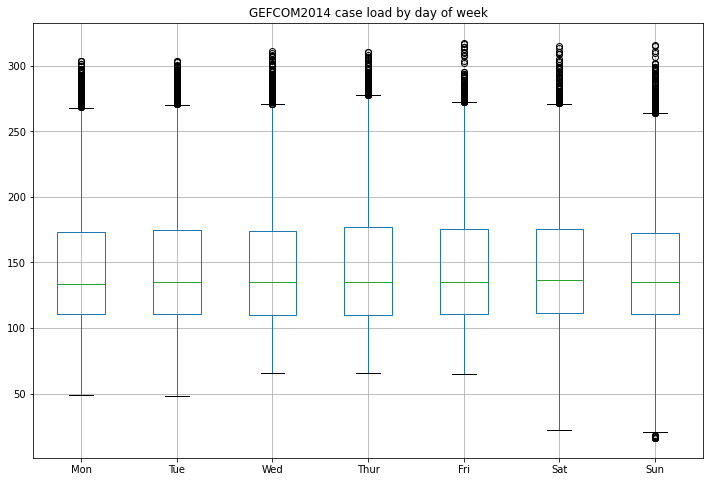

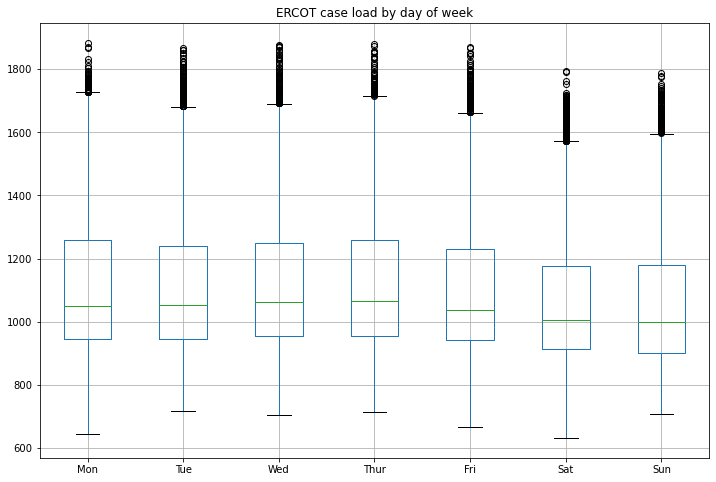

In [694]:
daysofweek(GEP1)
plt.title('GEP1 load by day of week')
daysofweek(Dieteren)
plt.title('Dieteren case load by day of week')
daysofweek(GEFCOM)
plt.title('GEFCOM2014 case load by day of week')
daysofweek(ERCOT)
plt.title('ERCOT case load by day of week')

TypeError: float() argument must be a string or a number, not 'datetime.time'

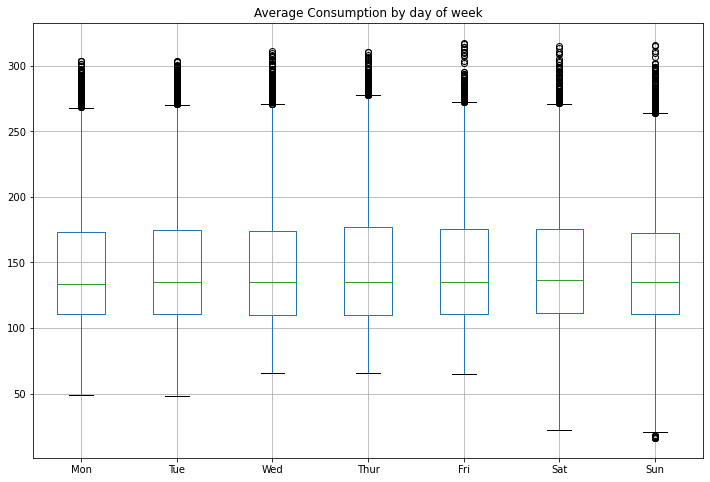

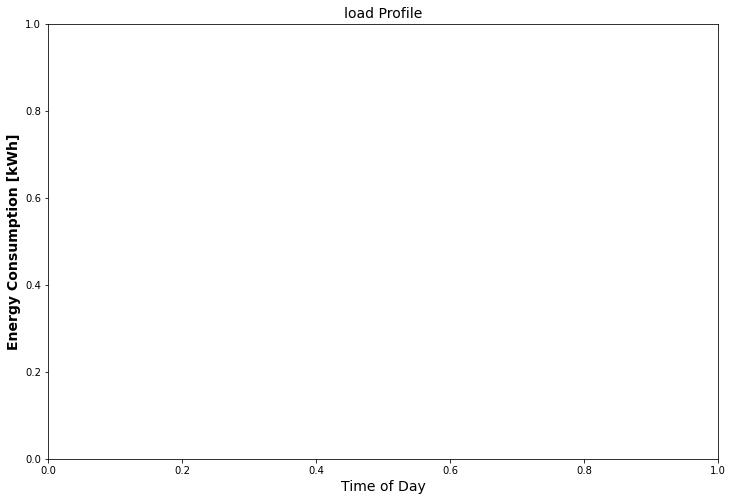

In [14]:
daysofweek(GEFCOM)
loadprofile(GEFCOM)
plot_weeks(GEFCOM)
acf(GEFCOM)
pacf(GEFCOM)